In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('Pharmaceuticals.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Symbol                 21 non-null     object 
 1   Name                   21 non-null     object 
 2   Market_Cap             21 non-null     float64
 3   Beta                   21 non-null     float64
 4   PE_Ratio               21 non-null     float64
 5   ROE                    21 non-null     float64
 6   ROA                    21 non-null     float64
 7   Asset_Turnover         21 non-null     float64
 8   Leverage               21 non-null     float64
 9   Rev_Growth             21 non-null     float64
 10  Net_Profit_Margin      21 non-null     float64
 11  Median_Recommendation  21 non-null     object 
 12  Location               21 non-null     object 
 13  Exchange               21 non-null     object 
dtypes: float64(9), object(5)
memory usage: 2.4+ KB


In [6]:
df.head()

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE


In [7]:
numerical_df = df.select_dtypes(include='float64')

<h1> Question 1 </h1>
I decided to use the Elbow Method to distort the distances between the cluster variables. This makes it eaiser while using Kmeans because it
Runs the k means by 1-9 varibles. Which will show an average score of the clusters and gives me the overall square distances between the
points. I decided to use 3 clusters based off the 9 variables allowed. k means algorithm treats the 9 variables as equal since the clustering
procedure is based off unweighted Euclidean distances of data points and cluster centers. The use of K means also shows automatic relevance
determination. As you can see from the graph below, the optimum value of K is between 2-4, i decided that 3 would be the best number to choose.

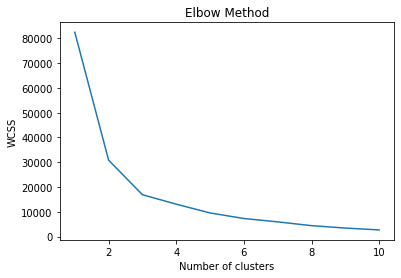

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(numerical_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(numerical_df)

In [10]:
numerical_df['cluster'] = pred_y

C:\Users\farcu\AppData\Local\Temp/ipykernel_18656/1188201355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['cluster'] = pred_y


In [11]:
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

numerical_df['cen_x'] = numerical_df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
numerical_df['cen_y'] = numerical_df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

C:\Users\farcu\AppData\Local\Temp/ipykernel_18656/2911903224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['cen_x'] = numerical_df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
C:\Users\farcu\AppData\Local\Temp/ipykernel_18656/2911903224.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['cen_y'] = numerical_df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})


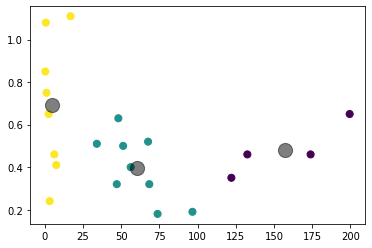

In [12]:
plt.scatter(numerical_df.iloc[:, 0], numerical_df.iloc[:, 1], c=pred_y, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [16]:
cluster_1

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
10,GSK,GlaxoSmithKline plc,122.11,0.35,18.0,62.9,20.3,1.0,0.34,21.87,21.1,Hold,UK,NYSE
12,JNJ,Johnson & Johnson,173.93,0.46,28.4,28.6,16.3,0.9,0.10,9.37,17.9,Moderate Buy,US,NYSE
14,MRK,"Merck & Co., Inc.",132.56,0.46,18.9,40.6,15.0,1.1,0.28,17.35,14.1,Hold,US,NYSE
16,PFE,Pfizer Inc,199.47,0.65,23.6,45.6,19.2,0.8,0.16,25.54,25.2,Moderate Buy,US,NYSE


In [18]:
cluster_2

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE
6,BMY,Bristol-Myers Squibb Company,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,Moderate Sell,US,NYSE
9,LLY,Eli Lilly and Company,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4,Hold,US,NYSE
15,NVS,Novartis AG,96.65,0.19,21.6,17.9,11.2,0.5,0.06,-2.69,22.4,Hold,SWITZERLAND,NYSE
17,PHA,Pharmacia Corporation,56.24,0.40,56.5,13.5,5.7,0.6,0.35,15.00,7.3,Hold,US,NYSE
18,SGP,Schering-Plough Corporation,34.10,0.51,18.9,22.6,13.3,0.8,0.00,8.56,17.6,Hold,US,NYSE
20,WYE,Wyeth,48.19,0.63,13.1,54.9,13.4,0.6,1.12,0.36,25.5,Hold,US,NYSE


In [19]:
cluster_3

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
5,BAY,Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,GERMANY,NYSE
7,CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ
8,ELN,"Elan Corporation, plc",0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,Moderate Sell,IRELAND,NYSE
11,IVX,IVAX Corporation,2.60,0.65,19.9,21.4,6.8,0.6,1.45,13.99,11.0,Hold,US,AMEX
13,MRX,Medicis Pharmaceutical Corporation,1.20,0.75,28.6,11.2,5.4,0.3,0.93,30.37,21.3,Moderate Buy,US,NYSE
19,WPI,"Watson Pharmaceuticals, Inc.",3.26,0.24,18.4,10.2,6.8,0.5,0.20,29.18,15.1,Moderate Sell,US,NYSE


In [20]:
cluster_1 = df.loc[numerical_df['cluster'] == 0]

In [21]:
cluster_2 = df.loc[numerical_df['cluster'] == 1]

In [22]:
cluster_3 = df.loc[numerical_df['cluster'] == 2]

In [23]:
cluster_1.mean()

C:\Users\farcu\AppData\Local\Temp/ipykernel_18656/3303641204.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster_1.mean()


Market_Cap           157.0175
Beta                   0.4800
PE_Ratio              22.2250
ROE                   44.4250
ROA                   17.7000
Asset_Turnover         0.9500
Leverage               0.2200
Rev_Growth            18.5325
Net_Profit_Margin     19.5750
dtype: float64

In [24]:
cluster_2.mean()

C:\Users\farcu\AppData\Local\Temp/ipykernel_18656/3253973855.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster_2.mean()


Market_Cap           60.397778
Beta                  0.396667
PE_Ratio             24.244444
ROE                  27.811111
ROA                  11.877778
Asset_Turnover        0.688889
Leverage              0.376667
Rev_Growth            8.832222
Net_Profit_Margin    18.200000
dtype: float64

In [25]:
cluster_3.mean()

C:\Users\farcu\AppData\Local\Temp/ipykernel_18656/268922487.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster_3.mean()


Market_Cap            4.87875
Beta                  0.69375
PE_Ratio             28.45000
ROE                  14.21250
ROA                   5.38750
Asset_Turnover        0.58750
Leverage              1.00375
Rev_Growth           15.89625
Net_Profit_Margin    10.93750
dtype: float64

<h1> Question 2 </h1>
as you can see from cluster 1, has a high market cap which shows that the cluster has a wider mean from that variable compared to the others.
This in turn shows that they have the highest net profit, lowest Price and high revenue growth. This shows in the cluster because it has the
most visible points from the center of the cluster and distance between close points. Having high numerical values consistently shows that
they produce more points for the K mean than cluster 2 or 3. I believe this shows that high market cap in relation to net profit show a more
staggered vertical draw for the k means. Cluster 2, they produce a high market cap but have a low net profit in comparasion to cluster 1.
This shows more scattered distances around the center of the cluster compared to the vertical formation for cluster 1. The numerical numbers
in cluster 2 show that having a more even spread of numbers compared to the others causes the k mean distances to be more spiratic. Cluster 3,
has the lowest in most to all numerical varibale category averages. which creates a more spread out distance between the center of the Cluster
and distance between each individual point.

<h1> Question 3 </h1>
While creating the clusters, I noticed that there is somewhat of a pattern between the numerical variables (1-9) and the non numerical variables (10-12). You can see in cluster 1, you can see that there is a a 50/50 shot out of the four datapoints that are either on hold or buy, regardless of being moderate or not. In cluster 2, there is more of an emphasis on holding with moderate levels of buying and selling. Then in cluster 3, that is follows the best pattern of all, being vertical with few outliers, which involves mostly buying and selling of
the median recommendation. majority of the exchanges are NYSE which does not support any type of pattern that would be involved in clustering
the mean, same with location. Median recommendation does however, because the change in numerical variables based off their stock prices can
effect what the median recommendation would be.

<h1> Question 4 </h1>
cluster 1, i decided to call it a closed market. I say this because it acts as a monopoly with not alot of competiton, high market caps,
revenue growth and net profits. People will buy at first then hold for the long-term because they are consistent and very low risk. Cluster 2,
I decided to name it a fair market, I say that because there are a good amount of competitors, more risky than cluster 1 but still produces
average market caps, revenue growth and net profits. Lots of people will hold these investemnts long-term, in the short run they will
fluctuate based off earnings and market share, but holding onto in the long-run will increase marginally. Cluster 3, is what I call open market,
i say this because there is high competition, less money spread out across the table, lower margins in all areas. Involves lots of buying
and selling mulitple times because of the higher risk and low reward.